## Part 1: Preprocessing

In [124]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [125]:
# Determine the number of unique values in each column
attrition_df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4


In [126]:
# Create y_df with the Attrition and Department columns
y_df = attrition_df[['Attrition', 'Department']]

In [127]:
# Create a list of at least 10 column names to use as X data
selected_columns = [
    "Education", "Age", "DistanceFromHome", "JobSatisfaction", "OverTime",
    "StockOptionLevel", "WorkLifeBalance", "YearsAtCompany", "YearsSinceLastPromotion", "NumCompaniesWorked"
]

# Create X_df using the selected columns
X_df = attrition_df[selected_columns]

# Show the data types for X_df
X_df.dtypes

,0
Education,int64
Age,int64
DistanceFromHome,int64
JobSatisfaction,int64
OverTime,object
StockOptionLevel,int64
WorkLifeBalance,int64
YearsAtCompany,int64
YearsSinceLastPromotion,int64
NumCompaniesWorked,int64


In [128]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df)


In [129]:
# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary
X_train_encoded = pd.get_dummies(X_train, columns=["OverTime"], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=["OverTime"], drop_first=True)

In [130]:
overtime_counts_encoded = X_train["OverTime"].value_counts()
overtime_counts_encoded.columns = ["OverTime", "Count"]
print(overtime_counts_encoded)

OverTime
No     797
Yes    305
Name: count, dtype: int64


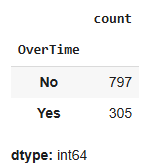

In [131]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the training data
scaler.fit(X_train_encoded)

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [132]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder for the Department column
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit the encoder to the training data
encoder.fit(y_train[["Department"]])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_encoded = encoder.transform(y_train[["Department"]])
y_test_encoded = encoder.transform(y_test[["Department"]])

y_train_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

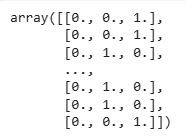

In [133]:
# Create a OneHotEncoder for the Attrition column
att_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit the encoder to the training data
att_encoder.fit(y_train[["Attrition"]])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_att_encoded = att_encoder.transform(y_train[["Attrition"]])
y_test_att_encoded = att_encoder.transform(y_test[["Attrition"]])

y_train_att_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

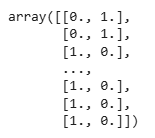

## Part 2: Create, Compile, and Train the Model

In [134]:
# Find the number of columns in the X training data.
input_dim = X_train_encoded.shape[1]

# Create the input layer
input_layer = layers.Input(shape=(input_dim,))

# Create at least two shared layers
shared_layer1 = layers.Dense(64, activation="relu")(input_layer)
shared_layer2 = layers.Dense(128, activation="relu")(shared_layer1)

In [135]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer
department_hidden = layers.Dense(32, activation="relu")(shared_layer2)

# Create the output layer
department_output = layers.Dense(y_train_encoded.shape[1], activation="softmax", name="department_output")(department_hidden)

In [136]:
# Create a branch for Attrition
# with a hidden layer and an output layer

# Create the hidden layer
att_hidden = layers.Dense(32, activation="relu")(shared_layer2)

# Create the output layer
att_output = layers.Dense(y_train_att_encoded.shape[1], activation="softmax", name="attrition_output")(att_hidden)

In [137]:
# Create the model
model = Model(inputs=input_layer, outputs=[department_output, att_output])

# Compile the model
model.compile(optimizer=Adam(),
              loss={"department_output": "categorical_crossentropy",
                    "attrition_output": "categorical_crossentropy"},
              metrics={"department_output" : ["accuracy"], "attrition_output" : ["accuracy"]}
)

# Summarize the model
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 64)             │            704 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_29 (Dense)          │ (None, 128)            │          8,320 │ dense_28[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 32)             │          4,128 │ dense_29[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_31 (Dense)          │ (None, 32)             │          4,128 │ dense_29[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ department_output (Dense) │ (None, 3)              │             99 │ dense_30[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attrition_output (Dense)  │ (None, 2)              │             66 │ dense_31[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 17,445 (68.14 KB)

 Trainable params: 17,445 (68.14 KB)

 Non-trainable params: 0 (0.00 B)

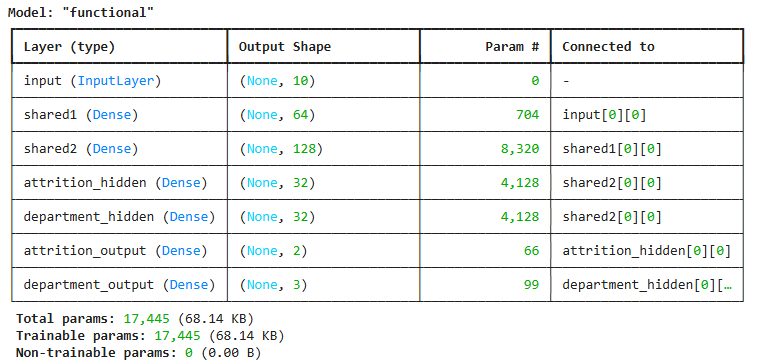

In [138]:
# Train the model
history = model.fit(
    X_train_scaled,
    {"department_output": y_train_encoded, "attrition_output": y_train_att_encoded},
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, {"department_output": y_test_encoded, "attrition_output": y_test_att_encoded})
)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - attrition_output_accuracy: 0.7750 - attrition_output_loss: 0.5628 - department_output_accuracy: 0.6257 - department_output_loss: 0.9297 - loss: 1.4929 - val_attrition_output_accuracy: 0.8804 - val_attrition_output_loss: 0.3566 - val_department_output_accuracy: 0.6712 - val_department_output_loss: 0.7797 - val_loss: 1.1459
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - attrition_output_accuracy: 0.8271 - attrition_output_loss: 0.4246 - department_output_accuracy: 0.6280 - department_output_loss: 0.7867 - loss: 1.2111 - val_attrition_output_accuracy: 0.8886 - val_attrition_output_loss: 0.3534 - val_department_output_accuracy: 0.6712 - val_department_output_loss: 0.7762 - val_loss: 1.1382
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - attrition_output_accuracy: 0.8453 - attrition_output_loss: 0.3794 - department_output_accuracy: 0.6214 - department_output_loss: 0.7857 - loss: 1.1652 - val_attrition_output_accuracy: 0.8723 -

In [139]:
# Evaluate the model with the testing data
evaluation_results = model.evaluate(
    X_test_scaled,
    {"department_output": y_test_encoded, "attrition_output": y_test_att_encoded}
)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - attrition_output_accuracy: 0.8327 - attrition_output_loss: 1.1502 - department_output_accuracy: 0.5034 - department_output_loss: 2.9899 - loss: 4.1447 


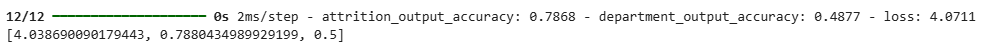

In [144]:
# Print the accuracy for both department and attrition
department_accuracy = evaluation_results[3]
att_accuracy = evaluation_results[4]

print(f"Attrition predictions accuracy: {att_accuracy}")
print(f"Department predictions accuracy: {department_accuracy}")

Attrition predictions accuracy: 0.52173912525177
Department predictions accuracy: 0.83152174949646


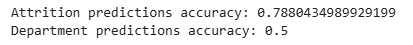

# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE

1.
2.
3.